In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
import math as math

%matplotlib inline

In [25]:
from google.colab import files
uploaded = files.upload()

Saving throughput_5G.csv to throughput_5G.csv


In [26]:
data = pd.read_csv('throughput_5G.csv')

In [27]:
with open('throughput_5G.csv') as inp:
    lista= list(zip(*(line.strip().split('\t') for line in inp))) 

new_list = np.asarray(lista)
data_Telephon = DataFrame(new_list.T, columns=['Power', 'Bandwidth', 'Rank'])
data_Telephon = data_Telephon.apply(pd.to_numeric) # convert all columns of DataFrame
data_Telephon[:-1]

,Power,Bandwidth,Rank
0,-68.6,472.7,3
1,-70.0,502.3,4
2,-67.0,447.9,3
3,-66.2,480.2,3
4,-67.2,432.8,3
...,...,...,...
1252,-99.1,214.9,2
1253,-99.3,212.8,2
1254,-96.0,212.3,2
1255,-98.1,205.0,2


In [28]:
data_Telephon = data_Telephon[data_Telephon['Bandwidth']!=0]
data_Telephon

,Power,Bandwidth,Rank
0,-68.6,472.7,3
1,-70.0,502.3,4
2,-67.0,447.9,3
3,-66.2,480.2,3
4,-67.2,432.8,3
...,...,...,...
1252,-99.1,214.9,2
1253,-99.3,212.8,2
1254,-96.0,212.3,2
1255,-98.1,205.0,2


# The bandwith as a function of the power has two exponential regimes, with two very different rates.

In [29]:
data_Telephon.info()
data_Telephon

<class 'pandas.core.frame.DataFrame'>
Int64Index: 827 entries, 0 to 1256
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Power      827 non-null    float64
 1   Bandwidth  827 non-null    float64
 2   Rank       827 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 25.8 KB


,Power,Bandwidth,Rank
0,-68.6,472.7,3
1,-70.0,502.3,4
2,-67.0,447.9,3
3,-66.2,480.2,3
4,-67.2,432.8,3
...,...,...,...
1252,-99.1,214.9,2
1253,-99.3,212.8,2
1254,-96.0,212.3,2
1255,-98.1,205.0,2


In [30]:
from matplotlib import style
style.use('fast')

In [31]:
data_Telephon1 = data_Telephon[(data_Telephon['Rank'])==1]
data_Telephon2 = data_Telephon[(data_Telephon['Rank'])==2]
data_Telephon3 = data_Telephon[(data_Telephon['Rank'])==3]
data_Telephon4 = data_Telephon[(data_Telephon['Rank'])==4]

In [32]:
data_Telephon1['Log Bandwidth'] = np.log(data_Telephon1['Bandwidth'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
data_Telephon2['Log Bandwidth'] = np.log(data_Telephon2['Bandwidth'])
data_Telephon3['Log Bandwidth'] = np.log(data_Telephon3['Bandwidth'])
data_Telephon4['Log Bandwidth'] = np.log(data_Telephon4['Bandwidth'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

Text(0, 0.5, 'Bandwidth (Mbit/s)')

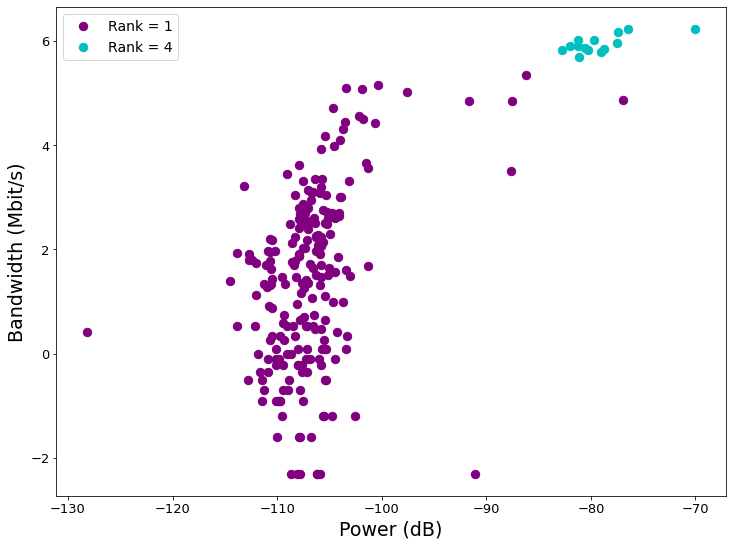

In [34]:
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
ax = data_Telephon1.plot.scatter(y='Log Bandwidth', x= 'Power', s=70, style= 'o', figsize=(12,9), color = 'purple', label='Rank = 1')
data_Telephon4.plot.scatter(x= 'Power',y='Log Bandwidth',  s=70, style= 'o', color = 'c', ax=ax, label='Rank = 4')
plt.legend(prop={"size":14})
#loc='upper left',bbox_to_anchor=(0.9, 0.4),
plt.xlabel('Power (dB)', fontsize= 19)
plt.ylabel('Bandwidth (Mbit/s)', fontsize= 19)

No handles with labels found to put in legend.


Text(0, 0.5, 'Log(Bandwidth)')

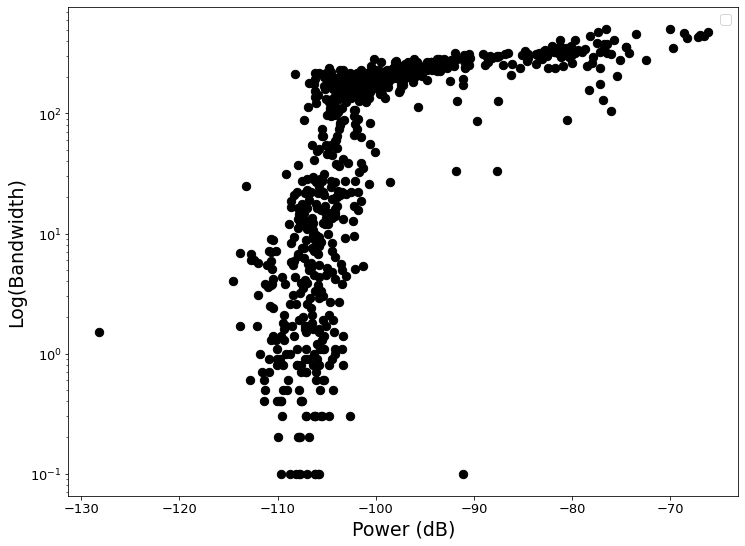

In [35]:
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
fig, ax = plt.subplots(figsize=(12, 9))

ax.scatter(data_Telephon1['Power'], data_Telephon1['Bandwidth'], color="k",s=70)
ax.scatter(data_Telephon2['Power'], data_Telephon2['Bandwidth'], color="k",s=70)
ax.scatter(data_Telephon3['Power'], data_Telephon3['Bandwidth'], color="k",s=70)
ax.scatter(data_Telephon4['Power'], data_Telephon4['Bandwidth'], color="k",s=70)
ax.legend(prop={"size":14})
#loc='upper left',bbox_to_anchor=(0.9, 0.4),
ax.set_yscale('log')

plt.xlabel('Power (dB)', fontsize= 19)
plt.ylabel('Log(Bandwidth)', fontsize= 19)

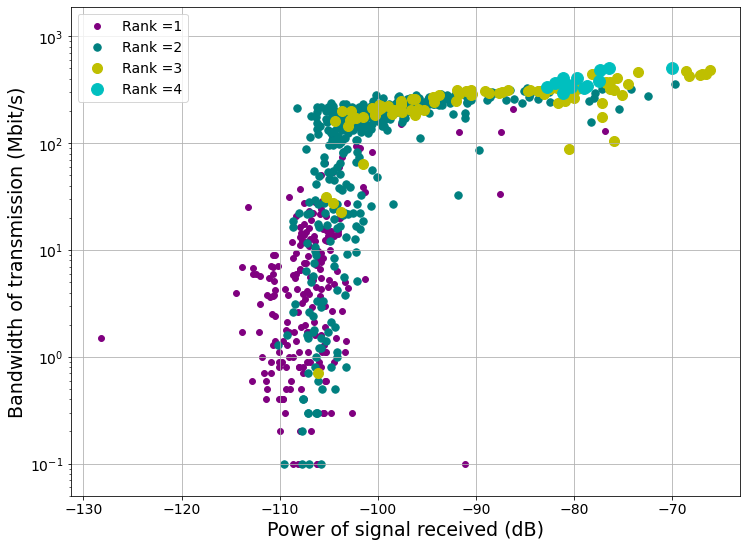

In [36]:
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
fig, ax = plt.subplots(figsize=(12, 9))

ax.scatter(data_Telephon1['Power'], data_Telephon1['Bandwidth'], color="purple", s=35, label = r'Rank =1')
ax.scatter(data_Telephon2['Power'], data_Telephon2['Bandwidth'], color="teal", s=55, label = r'Rank =2')
ax.scatter(data_Telephon3['Power'], data_Telephon3['Bandwidth'], color="y", s=100,label = r'Rank =3')
ax.scatter(data_Telephon4['Power'], data_Telephon4['Bandwidth'], color="c",s=140, label = r'Rank =4')
ax.legend(prop={"size":14})
#loc='upper left',bbox_to_anchor=(0.9, 0.4),
ax.set_yscale('log')

plt.xlabel('Power of signal received (dB)', fontsize= 19)
plt.ylabel('Bandwidth of transmission (Mbit/s)', fontsize= 19)
plt.ylim(0.05,1900)
plt.grid()

# **WEIGHT - HEIGHT PROBLEM**

# **a.** The deviation from gaussianity of the marginal distributions of height and weight


In [3]:
from google.colab import files
uploaded = files.upload()

Saving weight-height.csv to weight-height.csv


In [4]:
data_Weight = pd.read_csv('weight-height.csv')
data_Weight

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [5]:
data_Weight1 = data_Weight['Height']
data_Weight2 = data_Weight['Weight']

Text(0, 0.5, 'Density')

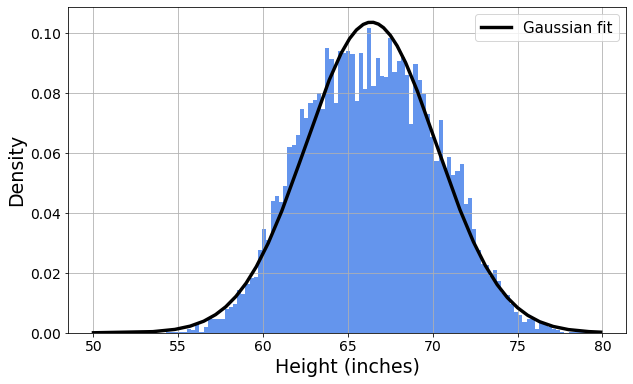

In [9]:
import math
mean1= data_Weight1.mean()
std1= data_Weight1.std()
x1=np.arange(50,80,0.1)
gaussian1 = np.exp(-(1/2)*(x1-mean1)**2/(std1**2))*(1/math.sqrt(2*math.pi*std1**2))

plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
data_Weight1.hist(bins= 100,figsize= (10,6), color='cornflowerblue',density= True)
plt.plot(x1,gaussian1, color = 'k', lw=3.4, label='Gaussian fit')
plt.legend(prop={"size":15})
plt.title(None)
plt.xlabel('Height (inches)', fontsize= 19)
plt.ylabel('Density', fontsize= 19)

Text(0, 0.5, 'Density')

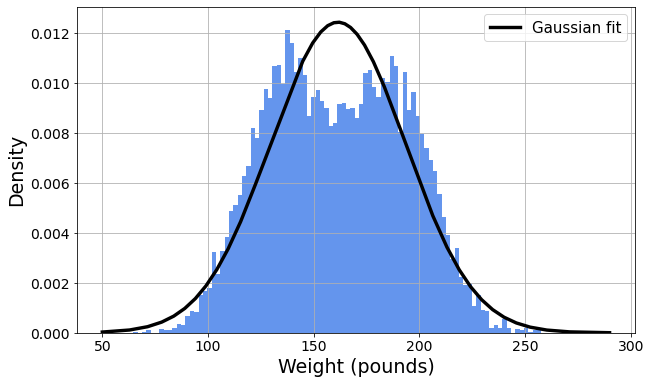

In [10]:
mean2= data_Weight2.mean()
std2= data_Weight2.std()
x2=np.arange(50,290,0.1)
gaussian2 = np.exp(-(1/2)*(x2-mean2)**2/(std2**2))*(1/math.sqrt(2*math.pi*std2**2))

data_Weight2.hist(bins= 100,figsize= (10,6), color='cornflowerblue',density= True)
plt.plot(x2,gaussian2, color = 'k', lw=3.4,label='Gaussian fit')

plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.legend(prop={"size":15})
x = np.arange(mean2-std2, mean2+std2, 0.01)
y1 = np.exp(-(1/2)*(x-mean2)**2/(std2**2))*(1/math.sqrt(2*math.pi*std2**2))
#plt.fill_between(x,y1 ,facecolor='blue')
plt.title(None)
#plt.title('(b)', fontsize=17, color='grey')
plt.xlabel('Weight (pounds)', fontsize= 19)
plt.ylabel('Density', fontsize= 19)

# **show the problems with Body-mass index ( https://en.wikipedia.org/wiki/Body_mass_index ) vs ponderal index ( https://en.wikipedia.org/wiki/Corpulence_index )**

# Body Mass Index BMI = $\frac{Mass(lb)}{Height(in)^2}\times703$ 

In [12]:
data_Weight['BMI'] =(data_Weight['Weight']/(data_Weight['Height']**2))*703 

In [13]:
data_Weight['BMI'] = data_Weight.apply(lambda x: (x['Weight']/((x['Height'])**2))*703, axis=1)

# Ponderal index CI = $\frac{Height(in)}{Mass(lb)^{2/3}}$

In [14]:
data_Weight['CI'] = data_Weight['Height']/(data_Weight['Weight']**(1/3))

In [15]:
data_Weight['CI']= data_Weight.apply(lambda x: x['Height']/((x['Weight'])**(1/3)), axis=1)

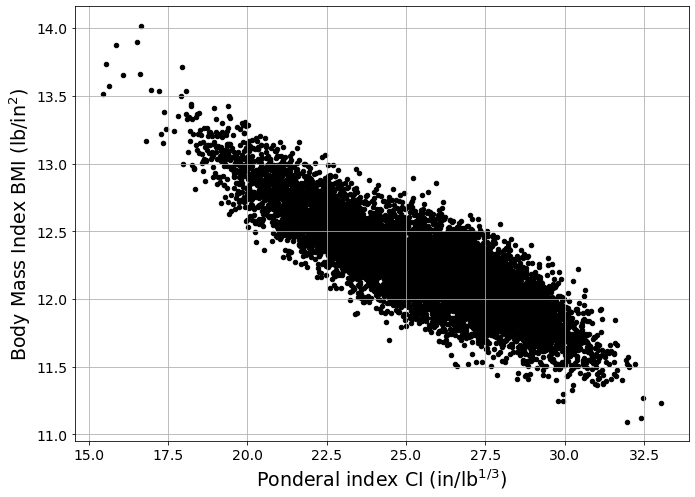

In [24]:
data_Weight.plot.scatter(x='BMI',y='CI', figsize=(11,8), color='k', fontsize= 14)
plt.rc('xtick', labelsize=19)    # fontsize of the tick labels
plt.rc('ytick', labelsize=19)    # fontsize of the tick labels
plt.xlabel(r'Ponderal index CI (in/lb$^{1/3}$)', fontsize = 19)
plt.ylabel(r'Body Mass Index BMI (lb/in$^2$)', fontsize = 19)
plt.grid()

In [ ]:
#import numpy
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define some test data which is close to Gaussian
#data = numpy.random.normal(size=10000)


# Define model function to be used to fit to the data above:
def gauss(x, *p):
    A, mu, sigma = p
    return A*numpy.exp(-(x-mu)**2/(2.*sigma**2))

# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
p0 = [1., 0., 1.]

coeff, var_matrix = curve_fit(gauss,199,data_Weight.hist(figsize= (10,6), color='teal'), p0=p0)

# Get the fitted curve
hist_fit = gauss(bin_centres, *coeff)

plt.plot(bin_centres, hist, label='Test data')
plt.plot(bin_centres, hist_fit, label='Fitted data')

# Finally, lets get the fitting parameters, i.e. the mean and standard deviation:
#print 'Fitted mean = ', coeff[1]
#print 'Fitted standard deviation = ', coeff[2]

# US Births

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving US_births_2000-2014.csv to US_births_2000-2014.csv


In [ ]:
d= pd.read_csv('US_births_2000-2014.csv', parse_dates=True)
d.head()

,2000,1,1.1,6,9083
0,2000,1,2,7,8006
1,2000,1,3,1,11363
2,2000,1,4,2,13032
3,2000,1,5,3,12558
4,2000,1,6,4,12466


In [ ]:
d= pd.read_csv('US_births_2000-2014.csv')
d.head()

,2000,1,1.1,6,9083
0,2000,1,2,7,8006
1,2000,1,3,1,11363
2,2000,1,4,2,13032
3,2000,1,5,3,12558
4,2000,1,6,4,12466


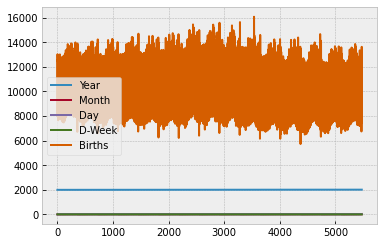

In [ ]:
d = pd.read_csv('US_births_2000-2014.csv')
m= d.rename(columns = {'2000' :'Year', '1':'Month', '1.1':'Day','6': 'D-Week', '9083': 'Births'})
#d.colums = ['Year','Month','Day','Births']
m.plot()

In [ ]:
m['Complete Date'] = m[['Year','Month','Day']].apply(lambda x : '{}-{}-{}'.format(x[0],x[1],x[2]), axis=1)
print(m)

      Year  Month  Day  D-Week  Births Complete Date
0     2000      1    2       7    8006      2000-1-2
1     2000      1    3       1   11363      2000-1-3
2     2000      1    4       2   13032      2000-1-4
3     2000      1    5       3   12558      2000-1-5
4     2000      1    6       4   12466      2000-1-6
...    ...    ...  ...     ...     ...           ...
5473  2014     12   27       6    8656    2014-12-27
5474  2014     12   28       7    7724    2014-12-28
5475  2014     12   29       1   12811    2014-12-29
5476  2014     12   30       2   13634    2014-12-30
5477  2014     12   31       3   11990    2014-12-31

[5478 rows x 6 columns]


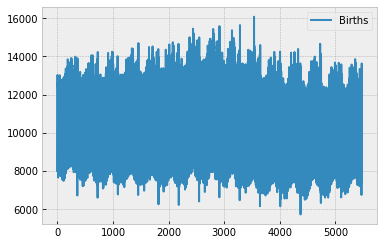

In [ ]:
data_series= m[['Complete Date','Births']]
data_series.plot()

# Example from the book

In [ ]:
births = pd.read_csv('US_births_2000-2014.csv')
births= births.rename(columns = {'2000' :'Year', '1':'Month', '1.1':'Day','6': 'D-Week', '9083': 'Births'})
births

,Year,Month,Day,D-Week,Births
0,2000,1,2,7,8006
1,2000,1,3,1,11363
2,2000,1,4,2,13032
3,2000,1,5,3,12558
4,2000,1,6,4,12466
...,...,...,...,...,...
5473,2014,12,27,6,8656
5474,2014,12,28,7,7724
5475,2014,12,29,1,12811
5476,2014,12,30,2,13634


In [ ]:
#births['decade'] = births['Year'] // 10
birth_D_Week = births.pivot_table('Births', index='Year', columns='D-Week', aggfunc='sum')
birth_D_Week

D-Week,1,2,3,4,5,6,7
Year,,,,,,,
2000,598752,669284,663638,662244,651274,470558,424765
2001,605994,665152,658150,661800,652970,462516,404381
2002,606957,681273,654251,655911,650496,452840,397585
2003,620872,690008,680636,662621,656021,453943,398959
2004,620243,692084,682091,682479,665541,448659,395766
2005,619382,698828,691405,689055,669905,454600,388766
2006,638381,709508,714113,711006,694546,460500,407100
2007,659518,718391,715413,716706,703036,464142,403578
2008,652450,723098,710042,693846,681938,453269,396094


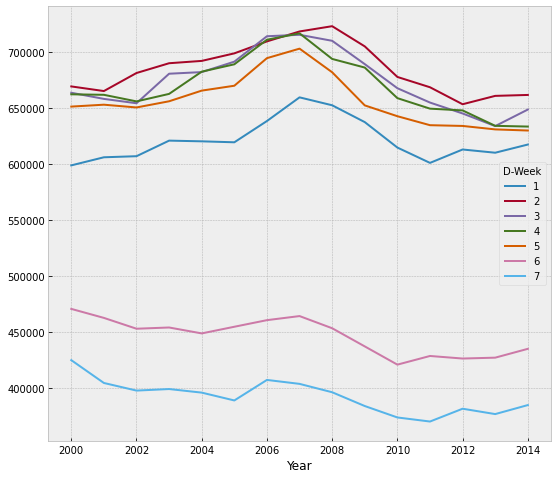

In [ ]:
birth_D_Week.plot(figsize=(9,8))

Week,0,1,2,3,4
Month,,,,,
1,10378.168539,11061.466667,10997.561905,11070.847619,11020.183333
2,11054.900000,11165.809524,11219.314286,11119.219048,11199.789474
3,11143.955556,11095.171429,11177.076190,11123.209524,11058.033333
4,11078.155556,11010.161905,11068.600000,11028.495238,10832.311111
5,11122.355556,11106.095238,11291.352381,11245.828571,11031.483333
6,11426.633333,11340.152381,11487.295238,11542.457143,11691.622222
7,11150.900000,11962.238095,11876.133333,11828.095238,11697.633333
8,11788.044444,11890.542857,11953.619048,11881.400000,12134.366667
9,11382.522222,12184.104762,12361.438095,12152.066667,11598.133333


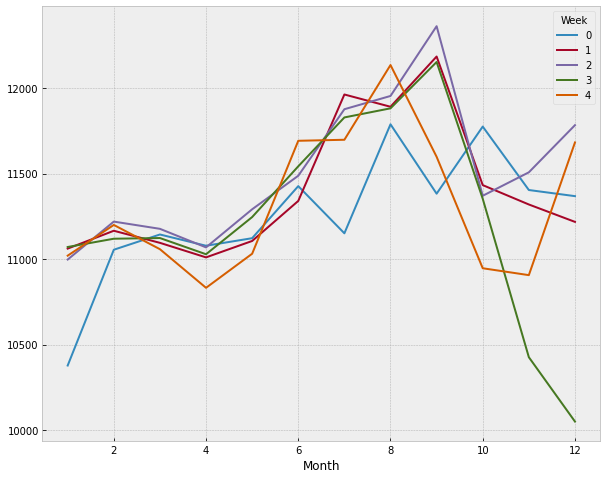

In [ ]:
births['Week'] = births['Day']//7
birth_Week = births.pivot_table('Births', index='Month', columns='Week', aggfunc='mean')
birth_Week.plot(figsize=(10,8))
birth_Week

In [ ]:
#births[''] = births['Day']*7
birth_Month = births.pivot_table('Births', index='Month', columns='Year', aggfunc='mean')

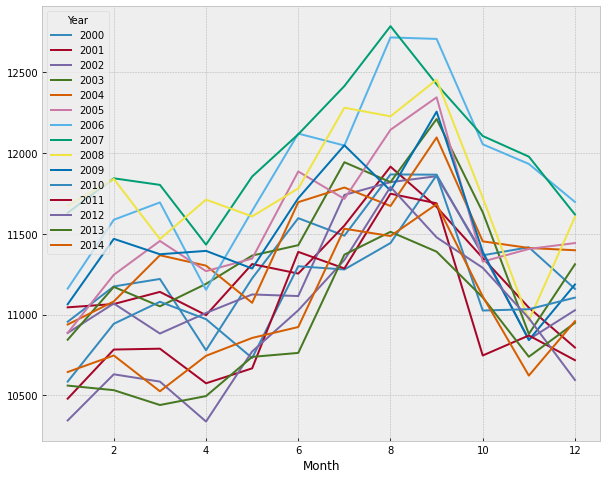

In [ ]:
birth_Month.plot(figsize=(10,8))

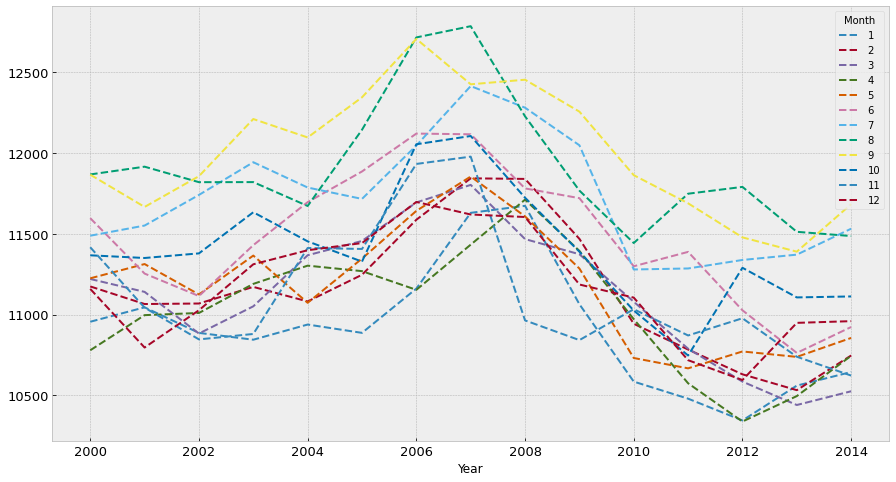

In [ ]:
birth_FullMonth.plot(figsize=(15,8),style='--')

Text(0.5, 0, 'Days of the week')

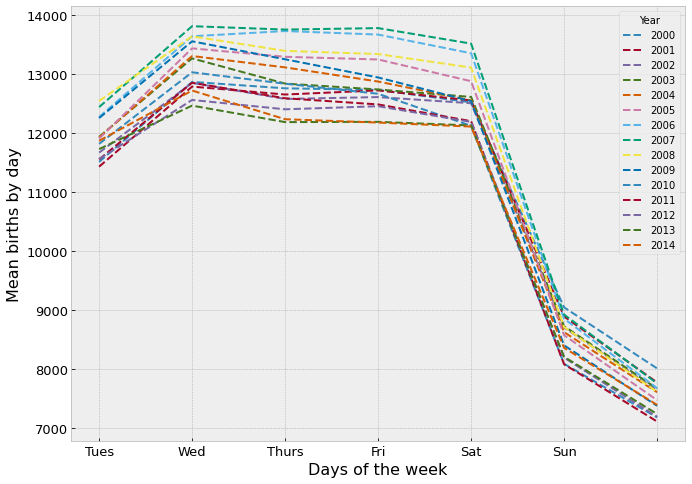

In [ ]:
births.pivot_table('Births', index='D-Week', columns='Year', aggfunc='mean').plot(figsize=(11,8),style='--')
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('Mean births by day', fontsize=16)
plt.xlabel('Days of the week', fontsize=16)

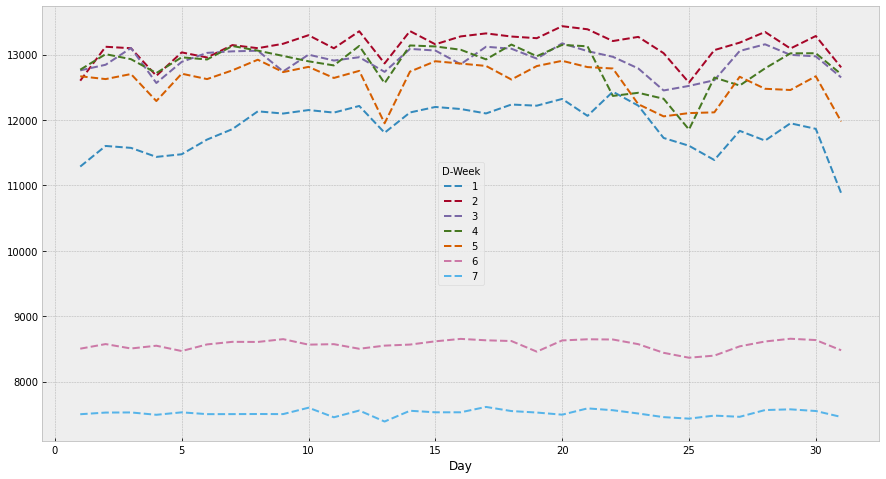

In [ ]:
 births.pivot_table('Births', index='Day', columns='D-Week', aggfunc='mean').plot(figsize=(15,8),style='--')

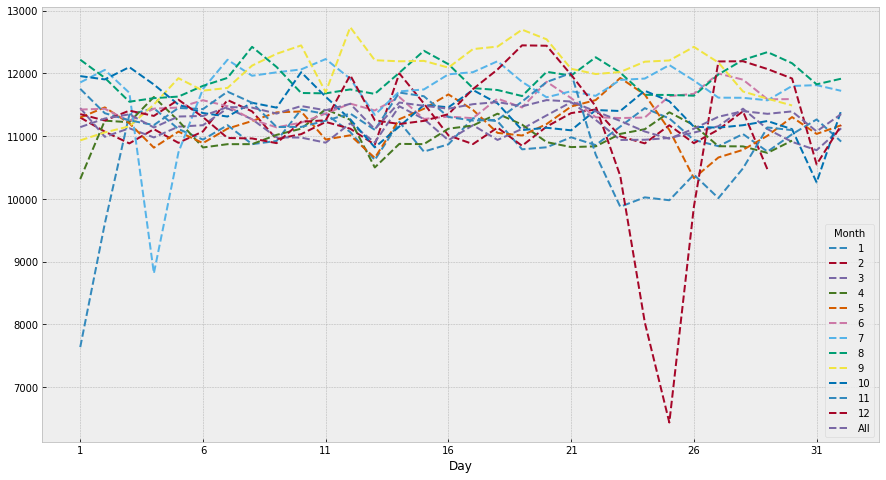

In [ ]:
births.pivot_table('Births', index='Day', columns='Month', aggfunc='mean', margins=True).plot(figsize=(15,8),style='--')

In [ ]:
o= births.pivot_table('Births', index='Day', columns='Month', aggfunc='mean', margins=True)

In [ ]:
o = o['All']

In [ ]:
op= o[:-1]

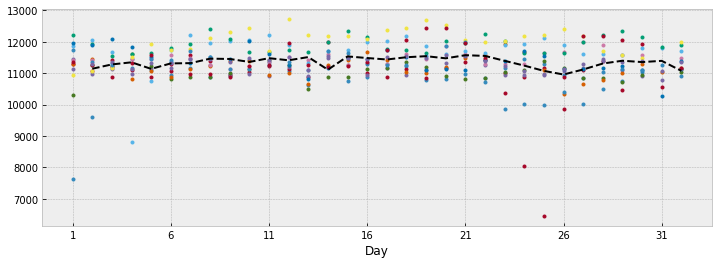

In [ ]:
#ax= plt.plot()
births.pivot_table('Births', index='Day', columns='Month', aggfunc='mean', margins=True).plot(figsize=(15,8),style='.', legend=None)
op.plot(figsize=(12,4),style='--', color= 'k')

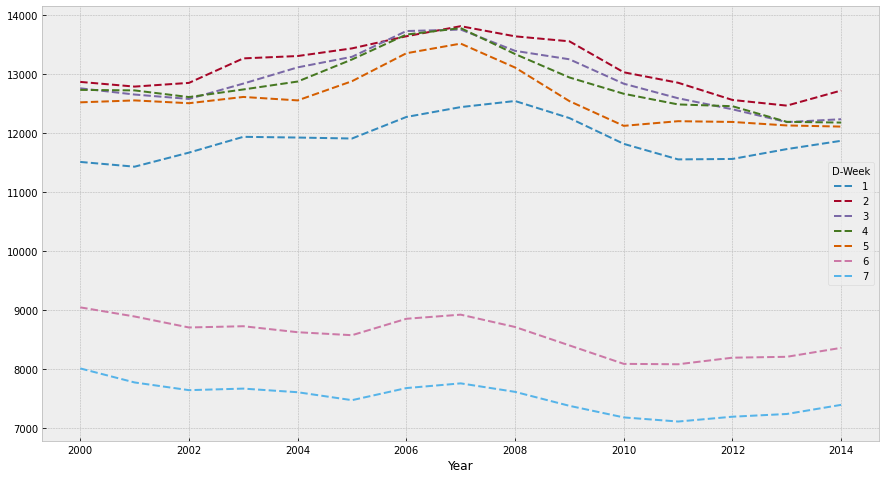

In [ ]:
 births.pivot_table('Births', index='Year', columns='D-Week', aggfunc='mean').plot(figsize=(15,8),style='--')

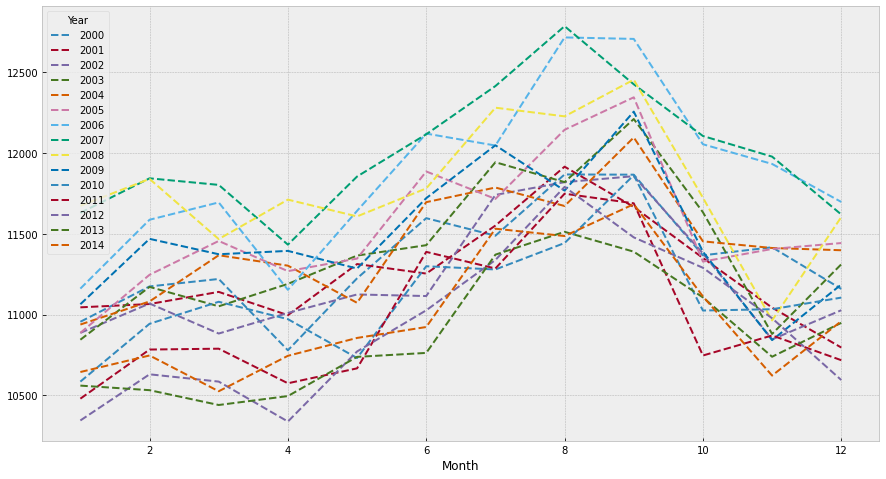

In [ ]:
 births.pivot_table('Births', index='Month', columns='Year', aggfunc='mean').plot(figsize=(15,8),style='--')

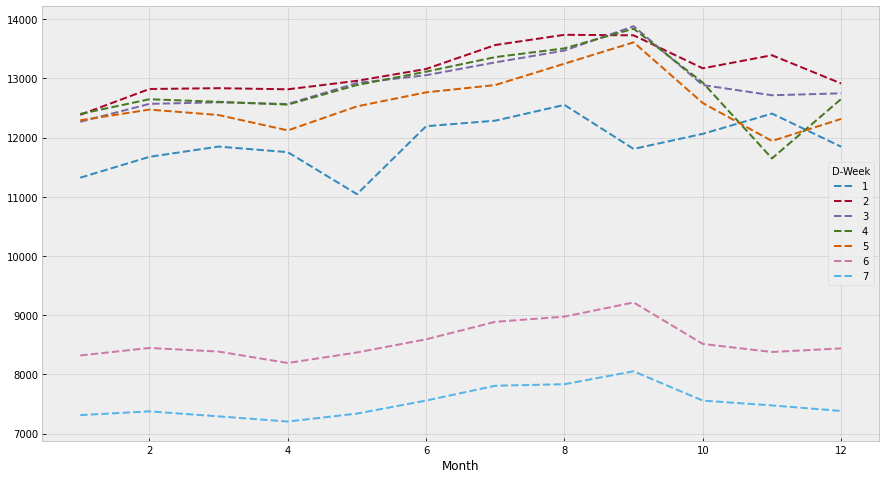

In [ ]:
 births.pivot_table('Births', index='Month', columns='D-Week', aggfunc='mean').plot(figsize=(15,8),style='--')